# IN6227-2023-Assignment-1.2
### Zhang, Xinlei (G2203715A)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
# from imblearn.combine import SMOTETomek

# Data Import

In [2]:
data_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
test_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [3]:

columns_name = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
        'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
        'hours_per_week', 'native_country', 'income']

train_set = pd.read_csv(data_URL, names=columns_name)

test_set = pd.read_csv(test_URL, names=columns_name, skiprows=1) 

# General Information

In [4]:
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             16281 non-null  int64 
 1   workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   education       16281 non-null  object
 4   education_num   16281 non-null  int64 
 5   marital_status  16281 non-null  object
 6   occupation      16281 non-null  object
 7   relationship    16281 non-null  object
 8   race            16281 non-null  object
 9   sex             16281 non-null  object
 10  capital_gain    16281 non-null  int64 
 11  capital_loss    16281 non-null  int64 
 12  hours_per_week  16281 non-null  int64 
 13  native_country  16281 non-null  object
 14  income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [7]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [8]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Exploratory Data Analysis

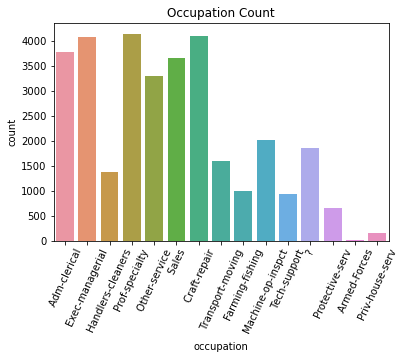

In [9]:
sns.countplot(x='occupation', data=train_set).set_title("Occupation Count")
plt.xticks(rotation=65)
plt.show()

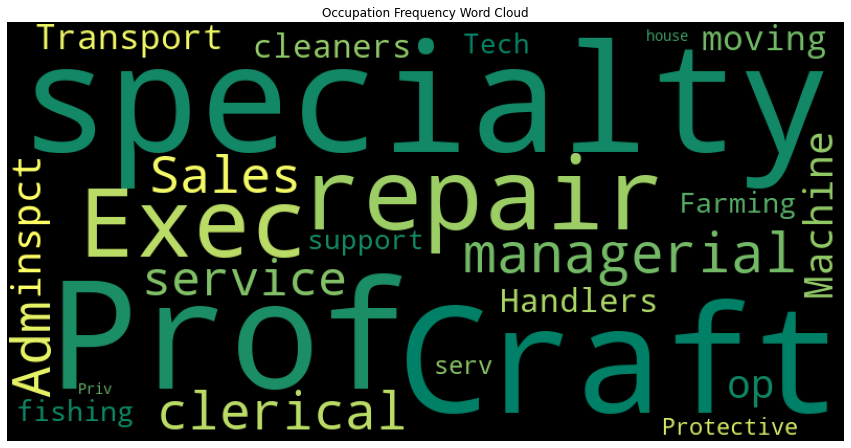

In [10]:
occupation_list = train_set['occupation']

plt.figure(figsize=(15,15))
wc = WordCloud(max_words=500, min_font_size=10, height=400, width=800, collocations=False,
               colormap='summer').generate(' '.join(occupation_list))

plt.title('Occupation Frequency Word Cloud')
plt.axis('off')
plt.imshow(wc)

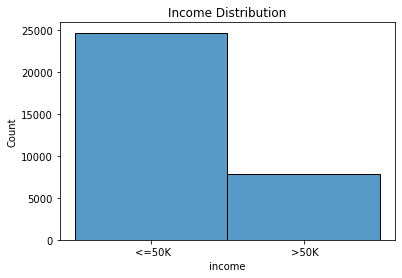

In [11]:
sns.histplot(train_set['income']).set_title("Income Distribution")
plt.show()

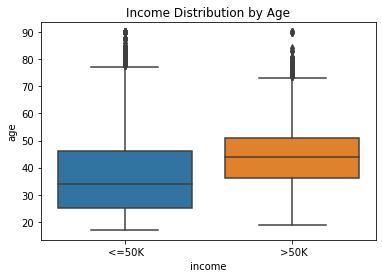

In [12]:
sns.boxplot(x='income', y='age', data=train_set).set_title('Income Distribution by Age')
plt.show()

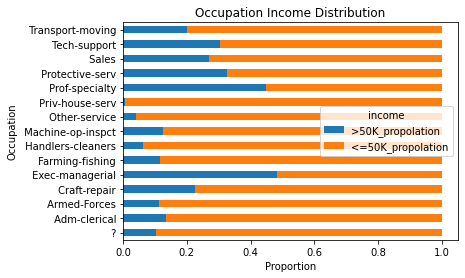

In [13]:
train_set['income'] = train_set['income'].str.strip()

occupation_stat = train_set.groupby('occupation')['income'].value_counts().unstack()
occupation_stat['total'] = occupation_stat.sum(axis=1)

occupation_stat['>50K_propolation'] = occupation_stat['>50K'] / occupation_stat['total']
occupation_stat['<=50K_propolation'] = occupation_stat['<=50K'] / occupation_stat['total']

occupation_stat[['>50K_propolation', '<=50K_propolation']].plot(kind='barh', stacked=True)
plt.title('Occupation Income Distribution')
plt.xlabel('Proportion')
plt.ylabel('Occupation')
plt.show()

# Data Preprocessing

In [14]:
# delete the useless column fnlwgt and education_num
train_set.drop('fnlwgt', axis=1, inplace=True) 
test_set.drop('fnlwgt', axis=1, inplace=True)

train_set.drop('education_num', axis=1, inplace=True) 
test_set.drop('education_num', axis=1, inplace=True)

In [15]:
# Missing Value Check 
missing_values = train_set.isin([' ?']).sum()
print('Train Set Missing Value Check')
print(missing_values)
print('\n')

print('Test Set Missing Value Check')
missing_values = test_set.isin([' ?']).sum()
print(missing_values)

Train Set Missing Value Check
age                  0
workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64


Test Set Missing Value Check
age                 0
workclass         963
education           0
marital_status      0
occupation        966
relationship        0
race                0
sex                 0
capital_gain        0
capital_loss        0
hours_per_week      0
native_country    274
income              0
dtype: int64


In [16]:
# Fill the unknown native country with "Not Clear"
train_set.loc[train_set['native_country'].isin([' ?']),'native_country'] = ' Not Clear'
test_set.loc[test_set['native_country'].isin([' ?']),'native_country'] = ' Not Clear'

In [17]:
# Check the situation
mask = train_set['occupation'].str.contains('\?') | train_set['workclass'].str.contains('\?')
missing_data = train_set.loc[mask, ['occupation', 'workclass']]

print(missing_data['occupation'].value_counts())
print(missing_data['workclass'].value_counts())

 ?    1843
Name: occupation, dtype: int64
 ?               1836
 Never-worked       7
Name: workclass, dtype: int64


In [18]:
# Fill the ’Never-worked‘ with "Not Clear"
train_set.loc[train_set['workclass'] == ' Never-worked', 'occupation'] = ' Not clear'
test_set.loc[test_set['workclass'] == ' Never-worked', 'occupation'] = ' Not clear'

In [19]:
age_count = train_set.loc[train_set['occupation'] == ' ?', 'age'].value_counts()

print(age_count.to_string())

20    115
19    113
18     92
21     89
22     79
17     64
23     46
62     42
28     41
65     39
63     39
67     39
66     37
61     36
24     34
27     33
35     32
25     32
64     31
60     31
68     28
30     28
29     28
69     28
34     26
33     26
72     25
32     25
70     24
36     23
26     22
55     22
58     20
59     20
31     19
49     18
41     18
71     18
40     17
38     17
51     17
54     16
48     16
76     16
57     16
42     15
73     15
47     14
50     14
52     14
56     13
43     13
74     12
53     12
39     12
45     11
75     11
46     11
44     10
77      9
37      9
78      9
79      7
90      7
81      6
80      6
82      5
84      2
83      1
87      1


In [20]:
# Suppose age <= 22 is student & age >= 60 is retired person

train_set.loc[(train_set['age'] >= 60) & (train_set['occupation'] == ' ?') & (train_set['workclass'] == ' ?'), ['occupation', 'workclass']] = ' Retired'
test_set.loc[(test_set['age'] >= 60) & (test_set['occupation'] == ' ?') & (test_set['workclass'] == ' ?'), ['occupation', 'workclass']] = ' Retired'
             
train_set.loc[(train_set['age'] <= 22) & (train_set['occupation'] == ' ?') & (train_set['workclass'] == ' ?'), ['occupation', 'workclass']] = ' Student'
test_set.loc[(test_set['age'] <= 22) & (test_set['occupation'] == ' ?') & (test_set['workclass'] == ' ?'), ['occupation', 'workclass']] = ' Student'


In [21]:
# Set other situation to Not Clear
train_set.loc[(train_set['occupation'] == ' ?') & (train_set['workclass'] == ' ?'), ['occupation', 'workclass']] = ' Not Clear'
test_set.loc[ (test_set['occupation'] == ' ?') & (test_set['workclass'] == ' ?'), ['occupation', 'workclass']] = ' Not Clear'

In [22]:
# Classify education
train_set.loc[train_set['education'].isin([' Preschool', ' 1st-4th', ' 5th-6th']), 'education'] = ' Primary'
train_set.loc[train_set['education'].isin([' 11th', ' 9th', ' 7th-8th', ' 10th',' 12th',' HS-grad']), 'education']= ' Secondary'

test_set.loc[test_set['education'].isin([' Preschool', ' 1st-4th', ' 5th-6th']), 'education'] = ' Primary'
test_set.loc[test_set['education'].isin([' 11th', ' 9th', ' 7th-8th', ' 10th',' 12th',' HS-grad']), 'education']= ' Secondary'

# Classify marital_status

train_set.loc[train_set['marital_status'].isin([' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse']), 'marital_status'] = ' Married'
train_set.loc[train_set['marital_status'].isin([' Never-married', ' Divorced', ' Separated', ' Widowed']), 'marital_status']= ' Non-Married'

test_set.loc[test_set['marital_status'].isin([' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse']), 'marital_status'] = ' Married'
test_set.loc[test_set['marital_status'].isin([' Never-married', ' Divorced', ' Separated', ' Widowed']), 'marital_status']= ' Non-Married'


In [23]:
# Convert continuous variable to discrete variable

# Age
bins = [0, 23, 30, 40, 50, 60, train_set['age'].max()]
labels = ['<=22', '23-30', '31-40', '41-50', '50-59', '60+']
train_set['age_category'] = pd.cut(train_set['age'], bins=bins, labels=labels)

train_set = train_set.drop('age', axis=1)


bins = [0, 23, 30, 40, 50, 60, test_set['age'].max()]
labels = ['<=22', '23-30', '31-40', '41-50', '50-59', '60+']
test_set['age_category'] = pd.cut(test_set['age'], bins=bins, labels=labels)

test_set = test_set.drop('age', axis=1)

# hours_per_week
bins = [0, 39, 40, train_set['hours_per_week'].max()]
labels = ['0-39', '40', '40+']
train_set['hours_per_week_category'] = pd.cut(train_set['hours_per_week'], bins=bins, labels=labels)

train_set = train_set.drop('hours_per_week', axis=1)


bins = [0, 39, 40, test_set['hours_per_week'].max()]
labels = ['0-39', '40', '40+']
test_set['hours_per_week_category'] = pd.cut(test_set['hours_per_week'], bins=bins, labels=labels)

test_set = test_set.drop('hours_per_week', axis=1)


In [24]:
train_set.head()

,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country,income,age_category,hours_per_week_category
0,State-gov,Bachelors,Non-Married,Adm-clerical,Not-in-family,White,Male,2174,0,United-States,<=50K,31-40,40
1,Self-emp-not-inc,Bachelors,Married,Exec-managerial,Husband,White,Male,0,0,United-States,<=50K,41-50,0-39
2,Private,Secondary,Non-Married,Handlers-cleaners,Not-in-family,White,Male,0,0,United-States,<=50K,31-40,40
3,Private,Secondary,Married,Handlers-cleaners,Husband,Black,Male,0,0,United-States,<=50K,50-59,40
4,Private,Bachelors,Married,Prof-specialty,Wife,Black,Female,0,0,Cuba,<=50K,23-30,40


In [25]:
test_set.head()

,workclass,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,native_country,income,age_category,hours_per_week_category
0,Private,Secondary,Non-Married,Machine-op-inspct,Own-child,Black,Male,0,0,United-States,<=50K.,23-30,40
1,Private,Secondary,Married,Farming-fishing,Husband,White,Male,0,0,United-States,<=50K.,31-40,40+
2,Local-gov,Assoc-acdm,Married,Protective-serv,Husband,White,Male,0,0,United-States,>50K.,23-30,40
3,Private,Some-college,Married,Machine-op-inspct,Husband,Black,Male,7688,0,United-States,>50K.,41-50,40
4,Student,Some-college,Non-Married,Student,Own-child,White,Female,0,0,United-States,<=50K.,<=22,0-39


In [26]:
# OneHotEncode the discrete data

One_Hot_Encoder = OneHotEncoder(sparse=False)
onehot_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'age_category', 'hours_per_week_category']
onehot_encoded = One_Hot_Encoder.fit_transform(train_set[onehot_cols])
train_set = pd.concat([train_set.drop(onehot_cols, axis=1), pd.DataFrame(onehot_encoded, columns=One_Hot_Encoder.get_feature_names_out(onehot_cols))], axis=1)

One_Hot_Encoder = OneHotEncoder(sparse=False)
onehot_cols = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'age_category', 'hours_per_week_category']
onehot_encoded = One_Hot_Encoder.fit_transform(test_set[onehot_cols])
test_set = pd.concat([test_set.drop(onehot_cols, axis=1), pd.DataFrame(onehot_encoded, columns=One_Hot_Encoder.get_feature_names_out(onehot_cols))], axis=1)

/Users/matthewzxl/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Users/matthewzxl/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [27]:
# LabelEncode the income data
Label_Encoder = LabelEncoder()

train_set[['native_country', 'income']] = train_set[['native_country', 'income']].apply(Label_Encoder.fit_transform)

Label_Encoder = LabelEncoder()
test_set[['native_country', 'income']] = test_set[['native_country', 'income']].apply(Label_Encoder.fit_transform)

In [28]:
train_set.head()

,capital_gain,capital_loss,native_country,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Not Clear,workclass_ Private,workclass_ Retired,...,sex_ Male,age_category_23-30,age_category_31-40,age_category_41-50,age_category_50-59,age_category_60+,age_category_<=22,hours_per_week_category_0-39,hours_per_week_category_40,hours_per_week_category_40+
0,2174,0,39,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,0,39,0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,39,0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,0,39,0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0,0,4,0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Model

In [29]:
train_set_without_income = train_set.drop(['income'], axis=1)
test_set_without_income = test_set.drop(['income'], axis=1)

x_train, y_train = train_set_without_income.values, train_set['income'].values
x_test, y_test = test_set_without_income.values, test_set['income'].values

# Consider doing a mixed sampling however it dramatically decreases the accuracy
# ros = SMOTETomek(random_state=42)
# X_resampled, y_resampled = ros.fit_resample(x_train, y_train)

## Decision Tree

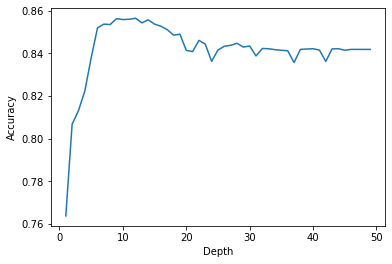

In [30]:
depths = []

for i in range(1,50):
    classifier = DecisionTreeClassifier(criterion="gini",max_depth=i,random_state=42, splitter="best").fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    depths.append(score)

plt.plot(range(1,50), depths)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

### The best Decision Tree Model

In [31]:
classifier = DecisionTreeClassifier(criterion="gini",max_depth=12,random_state=42, splitter="best").fit(x_train, y_train)
y_pred = classifier.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91     12435
           1       0.77      0.56      0.65      3846

    accuracy                           0.86     16281
   macro avg       0.82      0.76      0.78     16281
weighted avg       0.85      0.86      0.85     16281



### Decision Tree confusion matrix & AUC 

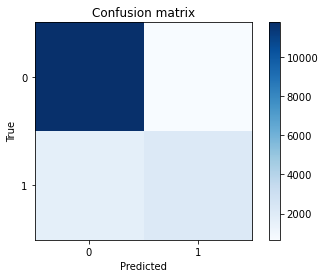

In [32]:
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])

# Display the plot
plt.show()

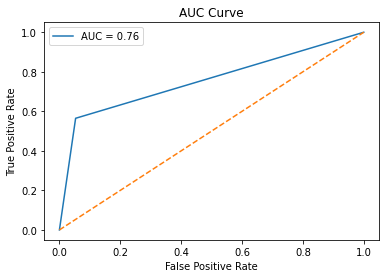

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend()

plt.show()

## KNN

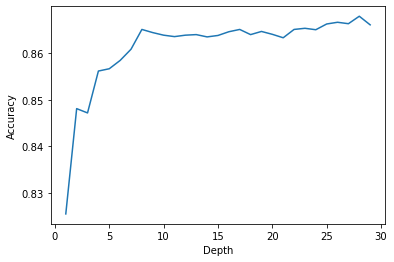

In [34]:
neighbors = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    neighbors.append(score)

plt.plot(range(1,30), neighbors)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

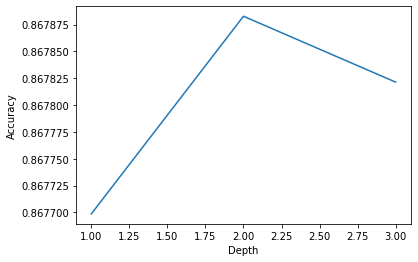

In [35]:
neighbors = []

for i in range(1,4):
    knn = KNeighborsClassifier(n_neighbors=28, p=i).fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    neighbors.append(score)

plt.plot(range(1,4), neighbors)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

### The best KNN Model

In [36]:
knn = KNeighborsClassifier(n_neighbors=28, p=2).fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     12435
           1       0.79      0.60      0.68      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.78      0.80     16281
weighted avg       0.86      0.87      0.86     16281



#### KNN confusion matrix & AUC 

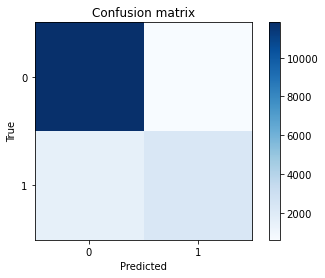

In [37]:
cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])

# Display the plot
plt.show()

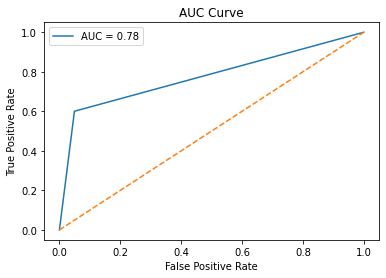

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC Curve')
plt.legend()

plt.show()